# <center>Training a Centralized Machine Learning Model</center>

 In this phase, we'll train a centralized machine learning (ML) model, where all data is aggregated in a single location for training. This approach allows for efficient computation, global optimization, and full access to the dataset, enabling the model to learn from all available patterns without constraints on data sharing.  

However, in real-world scenarios, centralized ML can face `privacy concerns`, data silos, and scalability challenges—which is where decentralized ML methods like **Federated Learning** become relevant. After benchmarking the centralized model, we will compare its performance, efficiency, and trade-offs against a decentralized ML setup.

---- 

In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import sys 
sys.path.append("../")

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score

import optuna

from src.config import BASE_DATA_DOWNSAMPLED
from src.local_utility import preprocess_data

In [3]:
cmap = sns.color_palette('Blues_r') 

In [4]:
base_df = pd.read_csv(BASE_DATA_DOWNSAMPLED)
base_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.759581,-1,49,60,0.029111,-1.677065,AB,886,...,1,500.0,0,INTERNET,1.699338,linux,0,1,0,5
1,1,0.9,0.413196,-1,188,40,0.021311,-0.423311,AB,2174,...,0,1500.0,0,INTERNET,3.892208,windows,0,1,0,7
2,0,0.9,0.527018,13,3,20,0.043816,51.131611,AA,1125,...,0,500.0,0,INTERNET,4.689088,macintosh,0,1,0,3
3,1,0.8,0.891709,-1,74,40,0.023161,21.852144,AA,872,...,0,1500.0,0,INTERNET,15.177750,windows,0,1,0,2
4,0,0.9,0.404491,-1,78,30,0.020393,-0.911295,AB,1311,...,0,200.0,0,INTERNET,7.687877,windows,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30803,1,0.8,0.698514,-1,154,50,0.012263,-0.557580,AA,895,...,0,2000.0,0,INTERNET,3.613473,other,1,1,0,7
30804,0,0.9,0.228335,-1,21,40,3.867462,-0.927913,AC,1406,...,0,200.0,0,INTERNET,8.011541,windows,0,1,0,1
30805,0,0.1,0.722089,31,4,20,0.013510,-1.021095,AC,1179,...,0,200.0,0,INTERNET,3.428016,macintosh,1,1,0,5
30806,0,0.4,0.608771,-1,18,20,0.019903,-1.396401,AD,1473,...,0,1500.0,0,INTERNET,5.220924,other,1,1,0,1


In [5]:
X = base_df.drop("fraud_bool", axis=1)
y = base_df["fraud_bool"]

In [6]:
df_encoded, _ = preprocess_data(base_df)

In [7]:
X_encoded = df_encoded.drop("fraud_bool", axis=1)
y_encoded = df_encoded["fraud_bool"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

----
## Model Training

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier

In [34]:
from src.train_centralized import train_predict

In [35]:
model1 = LogisticRegression(random_state=42)


Train Accuracy: 0.81 | Test Accuracy: 0.81 | Recall: 0.68 | Precision: 0.76 | ROC-AUC: 0.88

ROC-AUC After 3-Fold Cross Validation:  0.88

 ___________________________________________________________________________________________________ 



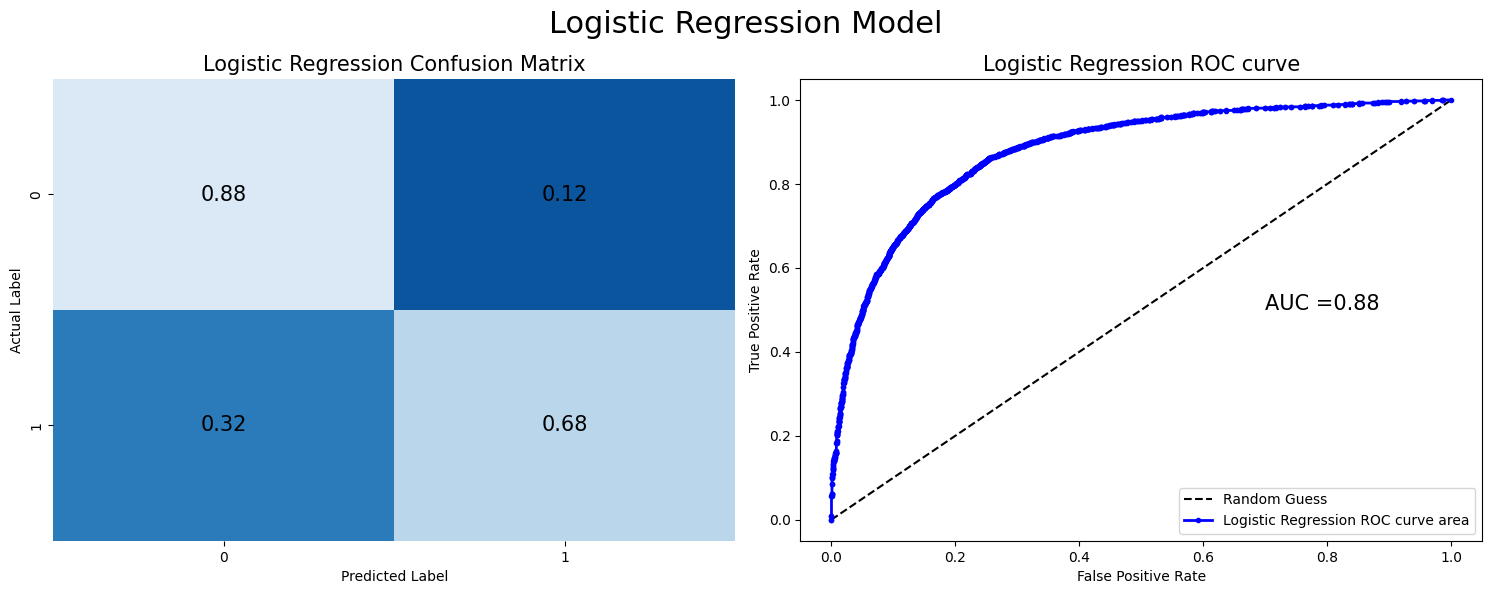

___________________________________________________________________________________________________ 

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      3954
           1       0.76      0.68      0.72      2208

    accuracy                           0.81      6162
   macro avg       0.80      0.78      0.79      6162
weighted avg       0.81      0.81      0.81      6162

___________________________________________________________________________________________________


In [36]:
result = train_predict(model1, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

In [37]:
model2 = RandomForestClassifier(random_state=42)


Train Accuracy: 1.00 | Test Accuracy: 0.82 | Recall: 0.67 | Precision: 0.79 | ROC-AUC: 0.89

ROC-AUC After 3-Fold Cross Validation:  0.87

 ___________________________________________________________________________________________________ 



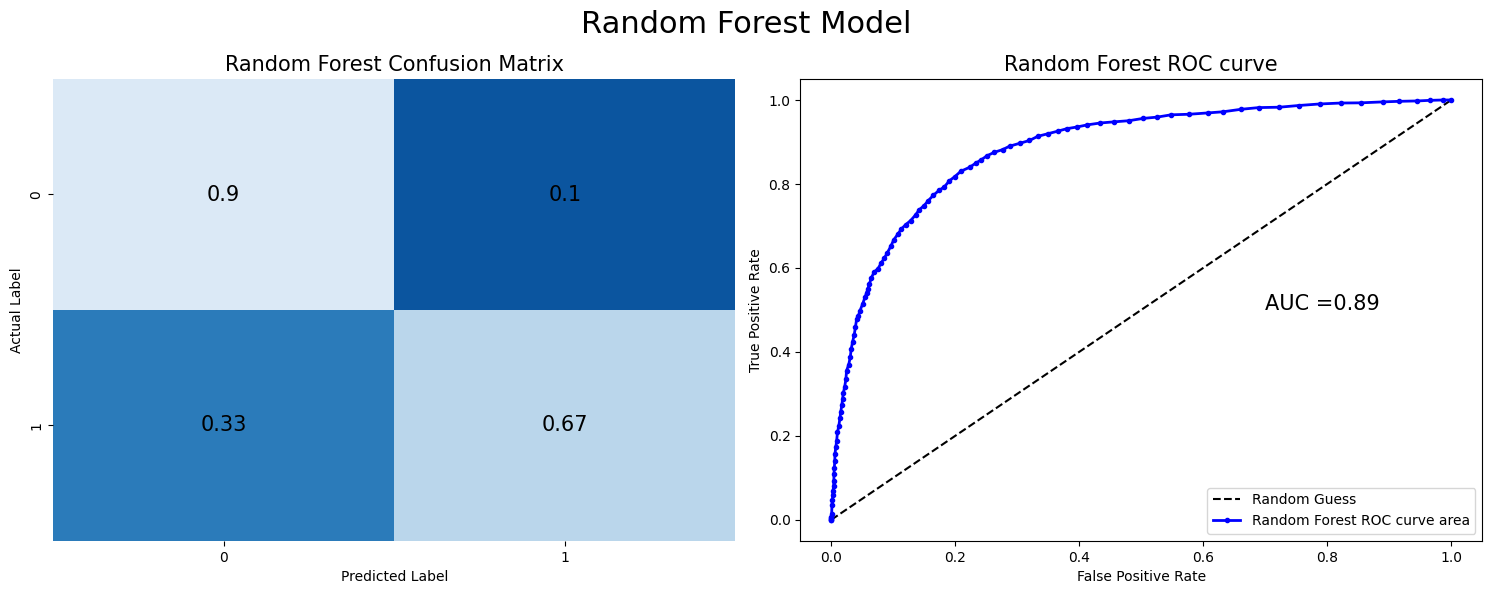

___________________________________________________________________________________________________ 

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3954
           1       0.79      0.67      0.72      2208

    accuracy                           0.82      6162
   macro avg       0.81      0.78      0.79      6162
weighted avg       0.81      0.82      0.81      6162

___________________________________________________________________________________________________


In [38]:
result = train_predict(model2, X_train, y_train, X_test, y_test, model_name="Random Forest")

In [39]:
model3 = XGBClassifier(random_state=42)


Train Accuracy: 0.94 | Test Accuracy: 0.82 | Recall: 0.72 | Precision: 0.78 | ROC-AUC: 0.89

ROC-AUC After 3-Fold Cross Validation:  0.87

 ___________________________________________________________________________________________________ 



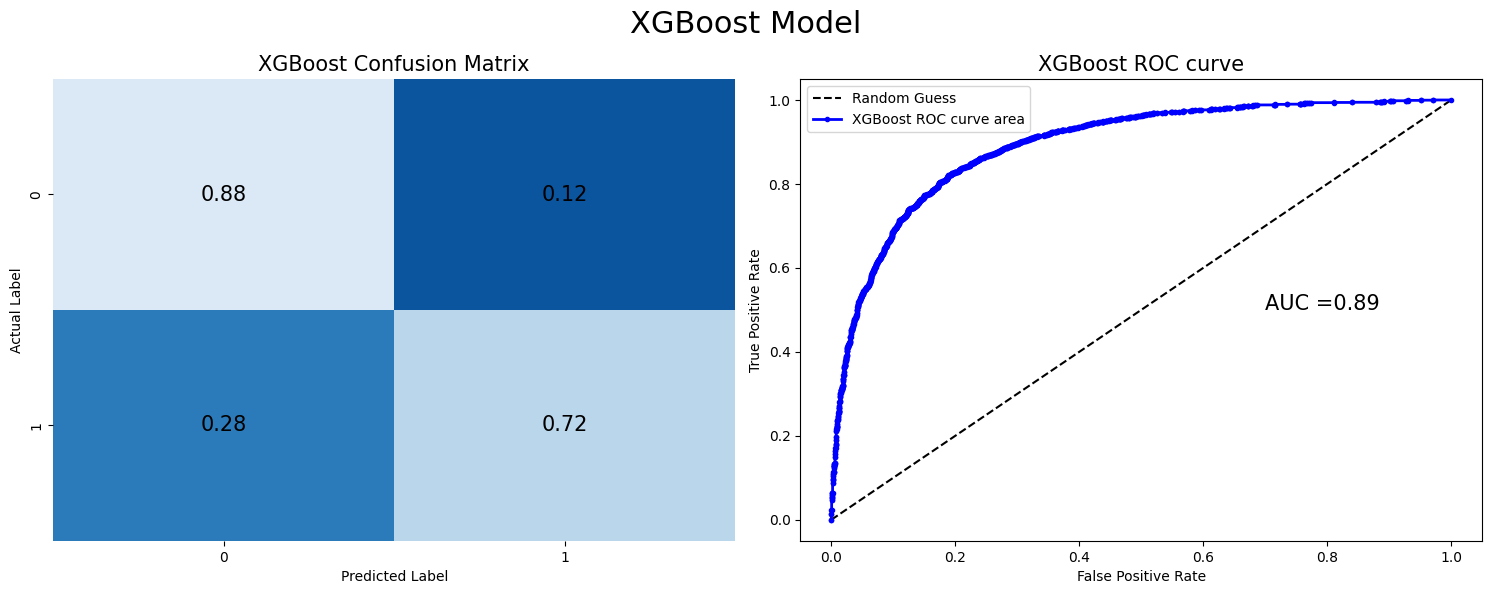

___________________________________________________________________________________________________ 

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3954
           1       0.78      0.72      0.75      2208

    accuracy                           0.82      6162
   macro avg       0.81      0.80      0.81      6162
weighted avg       0.82      0.82      0.82      6162

___________________________________________________________________________________________________


In [41]:
result = train_predict(model3, X_train, y_train, X_test, y_test, model_name="XGBoost")

In [42]:
model4 = LGBMClassifier(random_state=42, verbose=0)


Train Accuracy: 0.86 | Test Accuracy: 0.83 | Recall: 0.72 | Precision: 0.78 | ROC-AUC: 0.90

ROC-AUC After 3-Fold Cross Validation:  0.88

 ___________________________________________________________________________________________________ 



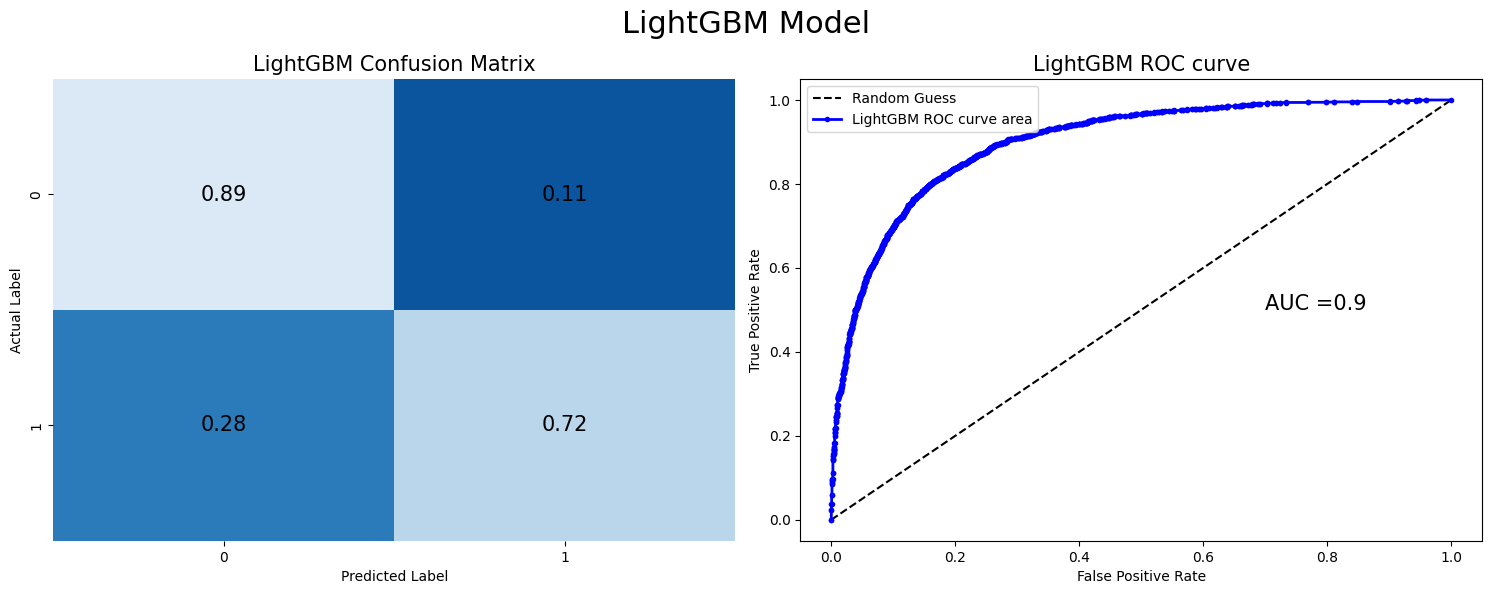

___________________________________________________________________________________________________ 

LightGBM Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3954
           1       0.78      0.72      0.75      2208

    accuracy                           0.83      6162
   macro avg       0.82      0.80      0.81      6162
weighted avg       0.83      0.83      0.83      6162

___________________________________________________________________________________________________


In [43]:
result = train_predict(model4, X_train, y_train, X_test, y_test, model_name="LightGBM")

In [44]:
pd.DataFrame(result) 

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,3-Fold CV ROC-AUC
0,Logistic Regression,0.81,0.76,0.68,0.72,0.88,0.88
1,Random Forest,0.82,0.79,0.67,0.72,0.89,0.87
2,XGBoost,0.82,0.78,0.72,0.75,0.89,0.87
3,XGBoost,0.82,0.78,0.72,0.75,0.89,0.87
4,LightGBM,0.83,0.78,0.72,0.75,0.90,0.88


---- 

## Hyperparameter Tunning

In [45]:
from src.train_centralized import objective

In [ ]:
optuna_result = {}

In [23]:
%%time

# Run Optimization For XGBoost
study = optuna.create_study(direction="maximize")
study.optimize(objective(X_train, y_train, "XGBoost"), n_trials=15)

# Best Results XGBoost
best_params_xgb =  study.best_params                   #<--- Access the best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)

optuna_result['xgb'] = best_params_xgb 

[I 2025-02-03 12:41:06,243] A new study created in memory with name: no-name-e22a9d21-239b-484e-8109-524d5522bfe6
[I 2025-02-03 13:15:17,803] Trial 0 finished with value: 0.8716316971774966 and parameters: {'n_estimators': 9050, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8716316971774966.
[I 2025-02-03 14:14:51,155] Trial 1 finished with value: 0.8786211763065909 and parameters: {'n_estimators': 9850, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8786211763065909.
[I 2025-02-03 14:24:02,025] Trial 2 finished with value: 0.8600190429110673 and parameters: {'n_estimators': 6000, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8786211763065909.
[I 2025-02-03 14:37:51,807] Trial 3 finished with value: 0.878476019623713 and parameters: {'n_estimators': 3900, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 1 with val

Best Hyperparameters: {'n_estimators': 4950, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 2}
Best ROC-AUC Score: 0.8795971517610139
CPU times: total: 2h 5min 32s
Wall time: 2h 11min 45s


----

In [47]:
%%time

# Run Optimization For Random Forest
study = optuna.create_study(direction="maximize")
study.optimize(objective(X_train, y_train, "Random Forest"), n_trials=5)

# Best Results Random Forest
best_params_rf =  study.best_params                   #<--- Access the best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)   

optuna_result['rf'] = best_params_rf

[I 2025-02-03 16:36:43,264] A new study created in memory with name: no-name-f7846f39-671d-4428-847e-b729ece084e1
[I 2025-02-03 17:30:29,193] Trial 0 finished with value: 0.8758180147420811 and parameters: {'n_estimators': 23750, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8758180147420811.
[I 2025-02-03 17:57:05,858] Trial 1 finished with value: 0.8472688830547788 and parameters: {'n_estimators': 20350, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8758180147420811.
[W 2025-02-03 18:10:10,679] Trial 2 failed with parameters: {'n_estimators': 9250, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\Emeka Obiefuna\Desktop\Data Science\Personal Projects\MLC - Research Work\MLC-FedML\.venv\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_value

KeyboardInterrupt: 

----

In [ ]:
%%time

# Run Optimization For LightGBM
study = optuna.create_study(direction="maximize")
study.optimize(objective(X_train, y_train, "LightGBM"), n_trials=15)

# Best Results LightGBM
best_params_lgbm =  study.best_params                   #<--- Access the best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)   

optuna_result['lgbm'] = best_params_lgbm